In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# EPHEMERIS 

## Computation of a Planet Position From Orbit Parameters


### Abstract

Knowing the orbital parameters of a planet or an asteroid to calculate the position  at certain moment of time. That is the task. It is a base for making different application from a celestial body mechanics simulations, visualizations, to computer games like Kerbal Space, etc. 

This work here uses only 3 Kepler's laws, and no perturbation theory, it is just first approximation of the planet motion. The three Kepler's laws was a big step for making a more accurate prediction for the planet positions for long periods of time. Kepler was able to make quite accurate tables, and he did not have a computer, so the method is computationally effective which makes it attactive for all those already mentioned applications.

### Problem Definition

Knowing the orbital parameters of a planet or an asteroid to calculate the coordinates of the position at any moment of time. The coordinates have to be at the coordinate system related to the Sun, and knowing the orbital parameters of the Earth to calculate observation coordinates at the Earth Sky for that asteroid or planet - to calculate declination and right ascension.

### Applicability

1. Solar related coordinates, could be useful for making simulations of how many different objects move in the Solar system. That could be used to make a nice visualizations, demonstrations, or even could be part of a computer game engine, etc.


2. Declination and right ascension are needed for observation of that object from the Earth. They could be used to point a telescope to that location on the Sky. Getting declination and right ascension is essencial because the result could be checked with all available such software. Precise input data as well as already calculated ephemerides are available from NASA-JPL or Minor Planet Center - thus checking the validity of the created program.


3. It could be used as starting point for more sophisticated project for celestial mechanic, as a first step in that area.


### Testing Data and Validation

Good source of asteroid and comet orbit parameters are "Minor Planet Center" and "NASA JPL" both sites offer ephemeris computations so the result of the program could be checked. The method used in this work is the Kepler's method only no perturbation theory so far, so it is expected for a reasonable periods of time to have a sufficient precision. Minor Planet Center offers unpredictability parameter so the testing data could be selected for those asteroids that have small such unpredictability - they would move in ellipse according to Kepler's laws.


### Visualization

Visualization could be impressing, but it is just another task for software developers, it is outside the scope of this work which is focused on mathematics. Visualization is unrelated with the main objective of this project.


### Entertainment

It could be part of a computer game or presentations for popularization of Astronomy. Solar system is not an empty space it is full with asteroids. Visualizing the entire swarm of them could be rather impressive. Here it is a picture showing how really big is the number of the minor planets - asteroids 

![Asteroids between Jupiter and inner Solar system](InnerSolarSystem-en.png)


## Orbital Elements of a Planet

Looking for an asteroid orbit parametes, reading at wikipedia or using NASA-JPL pages could give us information like that [Orbital Elements of 153002 (2000 JG5)](https://ssd.jpl.nasa.gov/sbdb.cgi?sstr=153002;orb=0;cov=0;log=0;cad=0#orb):

Orbital Elements at Epoch 2459200.5 (2020-Dec-17.0) TDB
Reference: JPL 73 (heliocentric ecliptic J2000)

| Element | Value     | Uncertainty (1-sigma) | Units |
|---------|-----------|-------------|-------|
| e <br> eccentricity |	0.7959518780556988	| 1.0972e-07 |
| a	<br> semi-major axis|	1.340551489041067	| 3.246e-09  | au
| q <br> perihelion distance |	0.2735370137084662   | 1.4737e-07 | au
| i	<br> inclination |	31.43144208629369	| 1.93e-05   | deg
| node <br> longitude of the ascending node| 213.071641162073	| 1.7777e-05 | deg
| peri <br> argument of perihelion | 233.4372674009908	| 1.8239e-05 | deg
| M <br> mean anomaly | 138.5679892519656     | 1.5986e-05 | deg
| tp <br> time of perihelion passage | 2458982.285256400691 <br> (2020-May-12.78525640) | 2.4709e-05 | TDB
| period <br> sidereal orbital period |  566.9224769719815 <br> 1.55 | 2.0591e-06 <br> 5.638e-09 | d <br>yr	
| n <br> mean motion |	0.6350074562624759 |	2.3064e-09 |	deg/d
| Q	<br> aphelion distance| 2.407565964373668	 | 5.8296e-09 |	au


Another useful site is **Minor Planet Center** and here it is orbital parametes for 

[(46610) Besixdouze - Little Prince asteroid](https://www.minorplanetcenter.net/db_search/show_object?utf8=%E2%9C%93&object_id=46610)

| Parameters | Values |
|---------|-----------|
| epoch	       | 2020-12-17.0 |
| epoch JD |	2459200.5 |
| perihelion date |	2021-02-20.42555 |
| perihelion JD	| 2459265.92555 |
| argument of perihelion (°) |	211.76600 |
| ascending node (°) |	172.06224 |
| inclination (°) |	2.40576 |
| eccentricity |	0.1802122 |
| perihelion distance (AU) | 1.8609434 |
| semimajor axis (AU) |	2.2700306 |
| mean anomaly (°) |	341.14599 |
| mean daily motion (°/day) |	0.28817500 |
| aphelion distance (AU) |	2.679 |
| period (years)|	3.42 |

And that hazardous asteroid 
[(153002)](https://www.minorplanetcenter.net/db_search/show_object?utf8=%E2%9C%93&object_id=153002)



| Parameters | Values |
|--------|-----------|
| epoch	| 2019-04-27.0 |
| epoch JD	| 2458600.5 |
| perihelion date	| 2018-10-23.71688 |
| perihelion JD	| 2458415.21688 |
| argument of perihelion (°) | 233.36802 |
| ascending node (°)	| 213.13820 |
| inclination (°)	| 31.45427 |
| eccentricity	| 0.7959196 |
| perihelion distance (AU)	| 0.2736170 |
| semimajor axis (AU)	| 1.3407313 |
| mean anomaly (°)	| 117.63243 |
| mean daily motion (°/day)	| 0.63487940 |
| aphelion distance (AU)	| 2.408 |
| period (years)	| 1.55 |


### Mandatory Parameters

Only 7 parameters are required to specify the orbit and to be able to calculate the planet motion. The rest of parameters can be calculated using only those 7 or different but equivalent set of parameters could also be used. 

The list of required parameters could be seen at the data format of the export file from Minor Planet Center:

#### Mandatory Parameters List -  Minor Planet Center File Data Format: 

    Epoch (in packed form, .0 TT)
   
    Mean anomaly at the epoch, in degrees

    Argument of perihelion, J2000.0 (degrees)
   
    Longitude of the ascending node, J2000.0 (degrees)
   
    Inclination to the ecliptic, J2000.0 (degrees)

    Orbital eccentricity
   
    Mean daily motion (degrees per day)
   
    Semimajor axis (AU)


#### Orbital Period

The parameter orbital period $P$ could be obtained from the semi-major axis, using 3rd Kepler's law thus reducing the orbital parameters to 6, but applying that law requires additional data like the Mass of the Sun or comparison with some well known Planet, its semi-major axis and the orbital period like the Earth: 

$$ 
    \frac{{P_1}^2}{{P_2}^2} = \frac{{a_1}^3}{{a_2}^3}
$$
where $a_1$, $a_2$ are semi-major axis, and $P_1$, $P_2$ are orbital periods.

or knowing the mass of the object or ignoring the mass of the asteroid as negletable to the mass of the SUN for the period we would have:
$$ 
    \frac{a^3}{{P}^2} = \frac{G(M+m)}{4\pi^2} \approx \frac{GM}{4\pi^2}
$$

So we need an additional parameters like the Earth's semi-major axis and orbital period of the mass of the Sun, and those are also parameters, so if we have already the orbital period $P$ then we would use it.

#### Mean Motion and Mean Daily Motion (degrees per day)

Mean motion $n$ is the average angular speed of the planet, and it corresponds to the **period** $P$ of the planet

$n = \frac{2\pi}{P}$ or $n = \frac{360^{\circ}}{P}$  

Mean daily motion is the average angular speed when the time is expressed in days. 

Example from the JPL the provided data for the hazardous asteroid 153002, 

$ P = 566.9224769719815 days $

Mean daily motion is

$ n  = {360^{\circ}}/{566.9224769719815} = 0.6350074562624758^{\circ}$ which is the same value as shown there. Multiplying with 360 would get the period $P$.

**Mean (daily) motion (degrees per day)** is used in next steps at calculations. 

### Ellipse - the Orbit of the Planet

From first Kepler's law we know that the planet revolves around the Sun, in **ellipse** and the Sun is located at one of the foci of that ellipse.

The ellipse is fully defined if we know the **semi-major axis** $a$ and the **eccentricity** $e$, in some places could be given perihelion $q$ and aphelion $Q$ distances, and from them we could calculate **semi-major axis** $a$ and the **eccentricity** $e$.


In [2]:
## asteroid 153002, source: MPC
# eccentricity
e = 0.7959196
# semimajor axis (AU)
a = 1.3407313

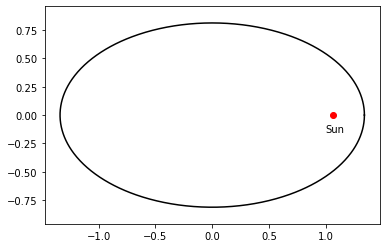

In [3]:
plt.axis("equal")
# minor semiaxis
b = a*math.sqrt(1-e*e)
# eccentric anomaly, 
E = np.linspace(0, 2*math.pi, 1000)
# plot ellipse
x = a*np.cos(E)
y = b*np.sin(E)
plt.plot(x, y, color='k')
# two foci, use one for the sun
xfl = -a*e;
xfr = a*e;
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("Sun", xy=(xfr, 0), xytext=(xfr-0.07, -0.15))
plt.show()

### Polar Coordinates for the Position of the Planet, and True Anomaly

The closest to the Sun point of the ellipse is called **perihelion**, the most distant point from the Sun is called **aphelion** - they are intersection of the ellipse and its major axis. 

To specify position of the planet in the plane of the planet orbit is used **polar coordinate system**. The Sun at the ellipse focus is the pole of the polar coordinates and semi-major axis that passes via the Sun is the initial line $0^{\circ}$ of the polar coordinates. 

The polar angle is measured starting from the perihelion to the planet in a positive direction - counter-clockwise.

Position of the planet in polar coordinates:

r - **Distance** from the pole (the Sun).

$\nu$ - The **polar angle** - the angle between perihelion, the sun and the planet.

#### True Anomaly
The polar angle $\nu$ in the context of planet motion is called **true anomaly**.

The ellipse equation for that polar coordinate system is:

$$
r = \frac{l}{1+e\,cos{\nu}}
$$
where $l = a(1 - e^2)$ is **semi-latus rectum**.

If we know the true anomaly $\nu$, we could calculate the distance $r$ using that formula and obtain polar coordinates, next we could convert them into cartesian ones.

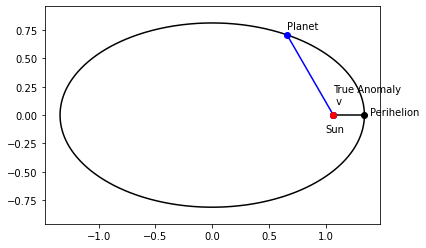

In [4]:
v_deg=120
plt.axis("equal")
plt.plot(x, y, color='k')
x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
v = (math.pi/180)*v_deg
r = a*(1-e*e)/(1+e*math.cos(v))
#note center of drawing CS is not the ellipse's focal polar CS, add a*e
xp = r*math.cos(v)+a*e
yp = r*math.sin(v)
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("Sun", xy=(xfr, 0), xytext=(xfr-0.07, -0.15))
plt.annotate("Perihelion", xy=(a, 0), xytext=(a+0.05, 0))
plt.annotate("Planet", xy=(xp, yp), xytext=(xp, yp+0.05))
plt.annotate("True Anomaly\n v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.show()

### Orbital Elements - Meaning and Purpose 

Orbital Elements Meaning
[Orbital_elements](https://en.wikipedia.org/wiki/Orbital_elements)

![Orbital_elements](Orbit1.svg)

#### Orbital Elements Symbols

$a$ Semimajor axis (AU)

$e$ Orbital eccentricity

$n$ Mean daily motion (degrees per day)

$\omega$ Argument of perihelion, J2000.0 (degrees)

$\Omega$ Longitude of the ascending node, J2000.0 (degrees)

$i$ Inclination to the ecliptic, J2000.0 (degrees)

$T$ Epoch (in packed form, .0 TT)

$M_0$ Mean anomaly at the epoch, in degrees

$\nu$ True Anomaly


### Purpose of Elements 

#### Calculating the Planet Motion

    Semimajor axis (AU)
    Orbital eccentricity
    Mean daily motion (degrees per day)

For a given time $t$ that passed since last perihelion of the planet, to calculate true anomaly $\nu$ and the distance from the Sun $r$.

#### Orientation of the Orbit at the Space, at Eccliptic coordinate system with the center the Sun.

    Argument of perihelion, J2000.0 (degrees)
    Longitude of the ascending node, J2000.0 (degrees)
    Inclination to the ecliptic, J2000.0 (degrees)

They would allow us to orient the orbit in 3 dimentional space and receive cartesian coordinates in the coordinate system related to the Sun and Earth eccliptic plane. Next steps could be if we know the coordinates of the Earth, or coordinates of the Sun at the Earth equatorial celestial spheres, to calculate declination and right ascension.

#### Defining where at the Orbit is the planet at the start time moment.

    Epoch (in packed form, .0 TT)
    Mean anomaly at the epoch, in degrees
    
Epoch defines the beginning of time, zero moment, the initial moment at which all parameters are measured, and since that moment we count the time. 

Mean anomaly at the epoch defines where the planet is at its orbit at that time. More precisely how much time passed since the planed had been in perihelion to that moment of time. 

How we can start finding position in several steps, each step arranged as different problems.

### 1. Position in an Elliptic Orbit

In this section, it is used the polar coordinate system that was already introduced, and the initial line of polar coordinates to coincide with the major axis of the ellipse, thus the polar angle would be equal to true anomaly. It is very easy to move to the coordinate system that initial line is coincide with the ascending node $\Omega$, the angle agrument $\theta = \nu + \omega$. But for now we would consider that $\omega = 0$ and $\theta = \nu$, The equation to the ellipse is then:

$$
r = \frac{l}{1+e\,cos{\nu}}
$$

The semi major axis of the ellipse is a , related to the
semi latus rectum by
$$
    l = a ( 1 - e^2 )
$$


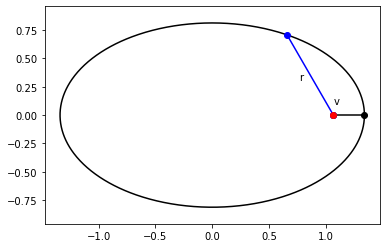

In [5]:
plt.axis("equal")
plt.plot(x, y, color='k')
x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.1, yp/2-0.05))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.show()

Let us  suppose that a planet is at perihelion at time $t = T$, and the aim of this section will be to find $\nu$ as a function of $t$.

The radius vector from Sun to planet does not move at constant speed (indeed Kepler’s
second law states how it moves), but we can say that, over a complete orbit, it moves at an *average* angular speed of $2\pi/P$, where the $P$ is the orbital period. 

The angle
$$
M = \frac{2\pi}{P}( t - T ) 
$$
is called the **mean anomaly** of the planet at a time t - T after perihelion passage. or mean anomaly could be expressed with mean daily motion
$$
M = n( t - T ) 
$$

The first step to find $\nu$ as a function of $t$ is to calculate the *eccentric anomaly* $E$ from the mean anomaly.

### Auxiliary Circle and Eccentric Anomaly

The circle whose diameter is the major axis of the ellipse is called the **eccentric circle** or, preferably, the **auxiliary circle**. From that definition the center of the auxiliary cirle is the center of the ellipse, and the radius is major semi-axis.

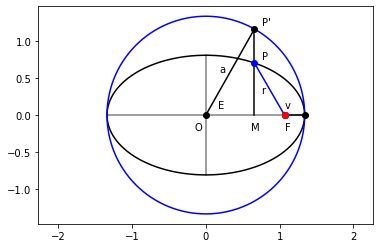

In [6]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.12, yp/2-0.06))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("E", xy=(0, 0), xytext=(+0.17, +0.1))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E+0.1, a*sin_E+0.05))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E+0.1, b*sin_E+0.05))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("a", xy=(0,0), xytext=(a*cos_E/2-0.15, a*sin_E/2))

plt.show()

The angle $E$ is called **eccentric anomaly**.

It is important to find a relation between **eccentric anomaly** $E$ and **true anomaly** $\nu$.

In the cartesian coordinate system, in grey at the figure, the ellipse has the equation:
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 
$$

The abscissas of the points $P$ and $P'$ is the same and it is $a\,cos{E}$.
The ordinate of $P'$ is $a\,sin{E}$ . By putting $x = a\,cos{E}$ in the equation of the ellipse, we immediately find that the ordinate of $P$ is $b\,sin{E}$.

A consequence of that is for any angle $E$ the point with cartesian coordinates 
$$
x = a\,cos{E}
$$
$$
y = b\,sin{E}
$$
belongs to an ellipse with major semi-axis $a$ and minor semi-axis $b$.

From:
$ MP' = a\,sin{E} $ and $ MP = b\,sin{E} $

The ratio:
$$ \frac{MP}{MP'} = \frac{b\,sin{E}}{a\,sin{E}} = \frac{b}{a}$$

**The ratio ${PM}/{P'M}$ for any line perpendicular to the major axis is $b/a$.**


Let's look at the triangle $FPM$, and from the theorem of Pythagoras

$$
    r^2 = MP^2 + FM^2 = MP^2 + (OM-OF)^2 = (b\,sin{E})^2 + (a\,cos{E}-ae)^2 =
$$

, and knowing that $b = \sqrt{a^2(1-e^2)}$ and with trivial simplifications we get 

$$
    = a^2(1-e^2)sin^2{E} + (a\,cos{E}-ae)^2 = a^2sin^2{E}-a^2e^2sin^2{E} + a^2cos^2{E} -2a^2ecos^2{E} + a^2e^2 = 
$$
$$
     = a^2 -2a^2ecos^2{E} + a^2e^2cos^2{E} = a^2(1-e\,cos{E})^2
$$

The **length of the radius vector** $r$
$$
    r = a(1-e\,cos{E})
$$

For $sin{\nu}$ and $cos{\nu}$,  for both cases when $\nu < 90^{\circ}$ and when $\nu > 90^{\circ}$ we get that

$$ sin{\nu} = \frac{MP}{r} = \frac{b\,sin{E}}{r} = \frac{a\sqrt{1-e^2}\,sin{E}}{a(1-e\,cos{E})}$$ 
$$ cos{\nu} = \frac{OM-OF}{r} = \frac{a\,cos{E}-ae}{a(1-e\,cos{E})}$$

So we have the relation between **eccentric and true anomaly**

$$
    sin{\nu} = \frac{\sqrt{1-e^2}\,sin{E}}{1-e\,cos{E}}
$$
and
$$
    cos{\nu} = \frac{cos{E}-e}{1-e\,cos{E}}
$$

The inverse formulas may also be useful::

$$
    cos{E} = \frac{e+cos{\nu}}{1+e\,cos{\nu}}
$$
and
$$
    sin{E} = \frac{sin{\nu}\sqrt{1-e^2}}{1+e\,cos{\nu}}
$$

The property "**The ratio ${PM}/{P'M}$ for any line perpendicular to the major axis is $b/a$.**" has an important corollary for areas of slices and sectors of auxiliary circle and the ellipse, the areas are also in ratio $b/a$.

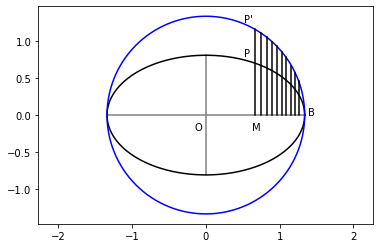

In [7]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
plt.plot(axc_x, axc_y, color='b')

for i in [20,25,30,36,40,44,48,52,56,60]:
    cos_E = math.cos((math.pi/180)*i)
    sin_E = math.sin((math.pi/180)*i)
    x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
    plt.plot(x1, y1, color='black')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))

plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.15, a*sin_E+0.1))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.15, b*sin_E+0.1))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("B", xy=(a,0), xytext=(a +0.05, 0))

plt.show()

####  The area of stips perpendicular to major axis to the ellipse and to the auxiliary cirle

Let's compare the areas of the figures $MBP$ and $MBP'$.

If we split at differential thin slices each perpendicular to the major axis, as it is shown at the figure above, and use that ratio $MP/MP' = b/a$, we can see that the area of $MBP$ is $b/a$ times the area of $MBP'$. We have that property for each differentially small rectangular slice with width $h$ - the ratio of the areas $MP\,h/MP'\,h = b/a$, the ratio is valid for the sum, and if the number of slices goes to infinite and width goes to zero then the ratio is preserved for the their limits which are the areas of the figures $MBP$ and $MBP'$.

**The ratio of the area of $MBP$ to the area of $MBP'$ is $b/a$ times.**

Consequently using that property we see that the area of the ellipse is  $b/a$ times the area of the auxiliary cirle; and since the area of the auxiliary circle is $\pi{a}^2$, it follows that the area of the ellipse is $\pi{a}{b}$. 

**The area of the ellipse is $\pi{a}{b}$**

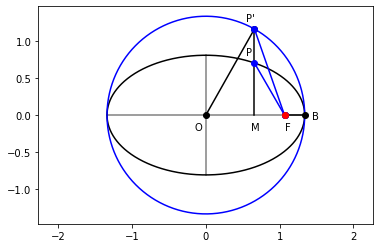

In [8]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
x1, y1 = [xfr, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.12, a*sin_E+0.10))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.12, b*sin_E+0.10))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("B", xy=(a,0), xytext=(a +0.10, -0.05))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))

plt.show()

**The ratio of the area of $FBP$ to the area of $FBP'$ is $b/a$ times.**

The area of triangle $MFP$: $$S_{MFP} = \frac{1}{2}MF\,MP $$
The area of triangle $MFP'$: $$S_{MFP'} = \frac{1}{2}MF\,MP' $$
So their ratio is
The area of triangle $MFP$: $$\frac{S_{MFP}}{S_{MFP'}} = \frac{MP}{MP'} = \frac{b}{a}$$
The ratio of areas $MBP$ and $MBP'$ is $b/a$.
$$\frac{S_{MBP}}{S_{MBP'}} = \frac{b}{a}$$

If the angle $\angle{BFP} > 90^{\circ} $

The figure $MBP$ is consisted of $FBP$ and $MFP$, and the figure $MBP'$ is consisted of $FBP'$ and $MFP'$, and for their areas are valid the equations:

$S_{MBP} = S_{FBP} + S_{MFP}$ and $S_{MBP'} = S_{FBP'} + S_{MFP'}$

And expressing $S_{FBP}$ and $S_{FBP'}$

$ S_{FBP} = S_{MBP} - S_{MFP} $ and $S_{FBP'} = S_{MBP'} - S_{MFP'}$

If the angle $\angle{BFP} < 90^{\circ} $

The figure $FBP$ is consisted of $MBP$ and $MFP$, and the figure $FBP'$ is consisted of $MBP'$ and $MFP'$, and for their areas are valid the equations:

$ S_{FBP} = S_{MBP} + S_{MFP} $ and $S_{FBP'} = S_{MBP'} + S_{MFP'}$

Unifying both cases we get for the areas:

$ S_{FBP} = S_{MBP} \pm S_{MFP} $ and $S_{FBP'} = S_{MBP'} \pm S_{MFP'}$

Using the ratio:

$$S_{MBP} \pm S_{MFP}=\frac{b}{a}S_{MBP'} \pm \frac{b}{a}S_{MFP'} = \frac{b}{a}(S_{MBP'} \pm S_{MFP'})$$

The ratio:

$$\frac{S_{FBP}}{S_{FBP'}} = \frac{S_{MBP} \pm S_{MFP}}{S_{MBP'} \pm S_{MFP'}} = \frac{b}{a}$$

Finally the ratio of areas $FBP$ and $FBP'$ is :

$$\frac{S_{FBP}}{S_{FBP'}} = \frac{b}{a}$$

That the last one is important for our task to find the eccentic anomaly from knowing mean motion since the last perihelion of the planet. We can resume to that task.

### Eccentic Anomaly from Mean Anomaly


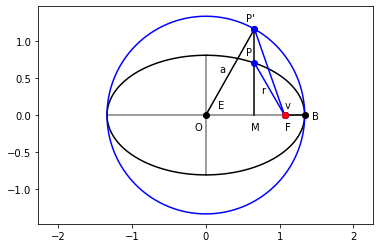

In [9]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
x1, y1 = [xfr, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.12, a*sin_E+0.10))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.12, b*sin_E+0.10))
plt.annotate("B", xy=(a,0), xytext=(a +0.10, -0.05))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.12, yp/2-0.06))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.annotate("E", xy=(0, 0), xytext=(+0.17, +0.1))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("a", xy=(0,0), xytext=(a*cos_E/2-0.15, a*sin_E/2))

plt.show()

### Eccentic Anomaly from Mean Anomaly

The first step to find $\nu$ as a function of $t$ is to calculate the *eccentric anomaly* $E$ from the mean anomaly.

For a given a moment of time $t$, the angle
$$
    M = \frac{2\pi}{P}( t - T ) = n( t - T ) 
$$
is called the **mean anomaly** of the planet at a time t - T after perihelion passage.

Now it is time to apply **second Kepler's law**.

*A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.*

From that law it follows that the planet is revolving at constant area speed, and that speed is:
$$
    \frac{\pi{ab}}{P}
$$

In time $t - T$ , the area swept out by the radius vector is the area $FBP$, and, because the radius vector sweeps out equal areas in equal times, this area is equal to the fraction $( t - T ) / P$ of the area of the ellipse, where $P$ is the orbital period.

In other words, this area of $FBP$ is:
$$
    S_{FBP} = \frac{(t-T)\pi{ab}}{P}
$$

Now let's use that 
$$
    \frac{S_{FBP}}{S_{FBP'}} = \frac{b}{a}
$$

$$
    S_{FBP'} = \frac{a}{b} S_{FBP} = \frac{a}{b}\frac{(t-T)\pi{ab}}{P} 
$$

The area of $FBP'$ is
$$
    S_{FBP'} = \frac{(t-T)\pi{a^2}}{P} 
$$

The area of the sector $OBP'$ with central angle eccentric anomaly $E$ is
$$
    S_{OBP'} = \frac{1}{2}E{a^2} 
$$

The area of triangle $OFP'$:
$$
    S_{OFP'} = \frac{1}{2}OF\,MP' = \frac{1}{2}{a}{e}{a}sin{E} = \frac{1}{2}{e}{a}^2sin{E}
$$


The sector $OBP'$ is consisted of the triangle $OFP'$ and the figure $FBP'$, and we can express the are of $FBP'$.

$$S_{FBP'} = S_{OBP'} - S_{OFP'}$$,

Now let's put all together
$$
\frac{(t-T)\pi{a^2}}{P} = \frac{1}{2}E{a^2} - \frac{1}{2}{e}{a}^2sin{E}
$$

Dividing by $a$ and multiplying by 2 gives us the following equation

$$
\frac{(t-T)2\pi}{P} = E - {e}\,sin{E}
$$

On the left side is precisely mean motion $M$

$$
M = E - {e}\,sin{E}
$$
that equation is called **Kepler's equation**.

Solution of that last transcedent equation would give eccentric anomaly. From eccentric anomaly the process of finding true anomaly and distance to the planet is straightforward. 

### Kepler's Equation

$$
M = E - {e}\,sin{E}
$$


### Newton-Raphson Process

It is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function. 

#### The solution of $f(x) = 0$
where $f(x)$ is a real function, and let $f'(x) \neq 0$ 

then we could start with making a first guess some random or taken by heuristic value $x_0$, somehow appropriate or close to the root. Then we continue calculating

$$
x_{1} = x_{0} - \frac{f(x_{0})}{f'(x_{0})},
$$

and $x_{1}$ is a better approximation of the root than $x_0$. 
Geometrically, $(x_1, 0)$ is the intersection of the x-axis and the tangent of the graph of $f$ at $(x_0, f (x_0))$. If we think of that tangent line as a linear approximation of the function $f$ at the point $x_{0}$, then the $x_{1}$ is the root of that linear approximation. This way it is found $x_{1}$ which is closer to the solution of the equation. The process is repeated as

$$
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})},
$$

until a sufficiently precise value is reached.

[Newton method](https://en.wikipedia.org/wiki/Newton%27s_method)


### Solving Kepler's Equation with Newton-Raphson process

The solution of Kepler’s equation is in fact very easy. We write it as 

$$
    f(E) = E - {e}\,sin{E} - M
$$

from which
$$
    f'(E) = 1 - {e}\,cos{E}
$$

and then, by the usual Newton-Raphson process:

$$
E = \frac{M-e(E cos{E}-sin{E})}{1-e\,cos{E}}
$$

### Applicability of Newton-Raphson process for Kepler's Equation 

It is seen that at each iteration we divide by 
$$
    f'(E) = 1 - {e}\,cos{E}
$$
So what about if that derivative becomes zero? 

OK we use to solve that equation for elliptic orbits and for that orbit the  eccentricity 

$$
    0 \le e < 1
$$
and 
$$
    -1 \le cos{E} \le 1
$$
and we have the inequality 
$$
    f'(E) = 1 - {e}\,cos{E} \ge 1 - {e} > 0 
$$

The first derivative $f'(E)$ never becomes zero, and because $f'(E) > 0$ the function $f$ **grows strictly monotonous**, as a conclusion, the equation $f(E) = 0$ has a single solution - exactly one root.

Because 
$
    f'(E) > 0 
$
that's why the value of the divisor $f'(E)$ is never checked for $0$.


### Considerations of Convergense

There is a proof [1] that if the $e<0.8$ good first quess is $E = M$, but if $e>0.8$ that might not work, the mathematical proof states that if the first guess is always $\pi$, the sequence of $E$ from the iterative process, always converges.



In [10]:
def KeplerEquation(e, M, precision_error):
    '''
    Solves Kepler's equation, for mean anomaly and eccentricity, 
    difference between values precision error.
    Note! It expects M in radians and returns the eccentric anomaly E in radians.
    M can be any value, it is normalized because of 2pi periodicity into the interval 
    [0, 2pi). It is expected to be bigger that 2pi if more than one orbital period passed 
    since perilehion. 
    Note! It might be better to be normalized as degrees and even as periods before 
    going to radians.
    '''
    # normalize M
    if ( M >= 2*math.pi ):
        two_pi = 2*math.pi
        M = M - two_pi*int(M / two_pi)
    
    # initial guess
    if e < 0.8:
        E = M
    else:
        E = math.pi
    
    prevE = math.inf
    while(abs(E-prevE)>precision_error):
        prevE = E
        cos_E = math.cos(E)
        E = (M - e*(E*cos_E - math.sin(E)))/(1-e*cos_E)

    return E


In [11]:
ecc = 0.7959196

# precise solution at 0
assert(KeplerEquation(ecc, 0, 0) == 0)
# precise solution at pi
assert(KeplerEquation(ecc, math.pi, 0) - math.pi < 1.0e-15)
# precise solution at 2*pi
assert(KeplerEquation(ecc, 2*math.pi, 0) - 2*math.pi < 1.0e-15)

# wolfram alpha, checked "0 = x - 0.7959196*sin(x) - pi/2" 
# result 2.20971
M = math.pi/2
assert(KeplerEquation(ecc, M, 1e-6) - 2.20971 < 5e-6)
print(KeplerEquation(ecc, M, 0))

# wolfram alpha, checked "0 = x - 0.7959196*sin(x) - 3*pi/2" 
# result 4.07347
M = 3*math.pi/2
assert(KeplerEquation(ecc, M, 1e-6) - 4.07347 < 5e-6)
print(KeplerEquation(ecc, M, 1e-6))

2.2097140940175026
4.073471213162083


In [12]:
ecc = 0.999

# precise solution at 0
assert(KeplerEquation(ecc, 0, 0) == 0)
# precise solution at pi
assert(KeplerEquation(ecc, math.pi, 0) - math.pi < 1.0e-15)
# precise solution at 2*pi
assert(KeplerEquation(ecc, 2*math.pi, 0) - 2*math.pi < 1.0e-15)

# wolfram alpha, checked "0 = x - 0.999*sin(x) - pi/2" 
# result 2.30944
M = math.pi/2
assert(KeplerEquation(ecc, M, 1e-6) - 2.30944 < 5e-6)
print(KeplerEquation(ecc, M, 0))

# wolfram alpha, checked "0 = x - 0.999*sin(x) - 3*pi/2" 
# result 3.97375
M = 3*math.pi/2
assert(KeplerEquation(ecc, M, 1e-6) - 3.97375 < 5e-6)
print(KeplerEquation(ecc, M, 0))

# close to aphelion
# wolfram alpha, checked "0 = x - 0.999*sin(x) - (math.pi - math.pi/12)" 
# result 3.01044
M = math.pi - math.pi/12
assert(KeplerEquation(ecc, M, 1e-6) - 3.01044 < 5e-6)
print(KeplerEquation(ecc, M, 0))

# close to aphelion
# wolfram alpha, checked "0 = x - 0.999*sin(x) - (math.pi + math.pi/12)" 
# result 3.27275
M = math.pi + math.pi/12
assert(KeplerEquation(ecc, M, 1e-6) - 3.27275 < 5e-6)
print(KeplerEquation(ecc, M, 0))

# close to perihelion
# wolfram alpha, checked "0 = x - 0.999*sin(x) - (math.pi/12)" 
# result 1.18879
M = math.pi/12
assert(KeplerEquation(ecc, M, 1e-6) - 1.18879 < 5e-6)
print(KeplerEquation(ecc, M, 1e-10))

# close to perihelion
# wolfram alpha, checked "0 = x - 0.999*sin(x) - (2*math.pi - math.pi/12)" 
# result 5.0944
M = 2*math.pi - math.pi/12
assert(KeplerEquation(ecc, M, 1e-6) - 5.0944 < 5e-6)
print(KeplerEquation(ecc, M, 1e-10))

2.3094396283182803
3.973745678861306
3.0104397349470977
3.2727455722324885
1.1887900773130626
5.094395229866524


In [13]:
## asteroid 153002, source: MPC
# eccentricity
e = 0.7959196
# semimajor axis (AU)
a = 1.3407313
# mean daily motion
n = 0.63487940
# mean anomaly (°)
M0 = 117.63243

In [14]:
def kepler_orbit_position(a, e, n, m0, t):
    '''
    Calculates position using Kepler's 1st and 2nd law.
    Orbit parameters
    a  - major semi-axis
    e  - eccentricity,
    n  - mean daily motion
    m0 - mean anomaly
    Arguments:
    t - time since epoch.
    Returns
    a pair of planet distance and angle true anomaly because the angle is not directly 
    needed and to avoid quadrant problem, sin(v) and cos(v) sin and cos from the true 
    anomaly are returned
    '''
    ## Mean anomaly in degrees
    m = n*t + m0
    
    ## Normalize it at 360 degrees, 
    if ( m > 360 ):
        m = m - 360*int(m / 360)
        
    ## and make it radians
    m = m*math.pi/180
   
    ## Calculate Eccentric anomaly from the mean anomaly
    ecc_anomaly = KeplerEquation(e, m, 1e-6)
    
    cos_E = math.cos(ecc_anomaly)
    sin_E = math.sin(ecc_anomaly)
    
    ## that expression is used several times
    dist_factor = (1-e*cos_E)
    
    ## Calculate distance to the planet
    r = a*dist_factor

    ## Calculate true anomaly, cos, and sin
    sin_v = (math.sqrt(1-e*e)*sin_E)/dist_factor
    cos_v = (cos_E-e)/dist_factor

    ## return polar coordinates with the pole the ellipse focus, where the Sun is.
    return [r, cos_v, sin_v]

In [15]:
def demo_draw_constant_area_speed(a, e, n, m0, angle_step, linewidth=0.2) :
    plt.axis("equal")
    angle_samples = int(360/angle_step)
    for asample in range(0, angle_samples):
        angl = asample*angle_step
        t = angl/n
        planet_pos = kepler_orbit_position(a, e, n, m0, t)
        x_pos = planet_pos[0]*planet_pos[1]
        y_pos = planet_pos[0]*planet_pos[2]
        #print(f"x={x_pos} y={y_pos}")
        x1, y1 = [0, x_pos], [0, y_pos]
        plt.plot(x1, y1, color='red', linewidth=linewidth, alpha=1)
        
    plt.plot([0], [0], marker = 'o', color='yellow')
    plt.show()

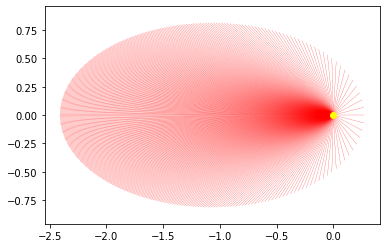

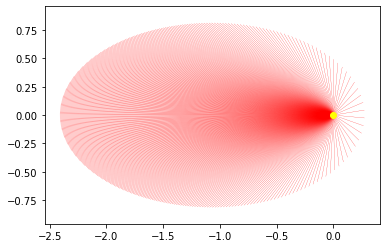

In [16]:
demo_draw_constant_area_speed(a, e, n, 0, 1)
demo_draw_constant_area_speed(a, e, n, M0, 1)

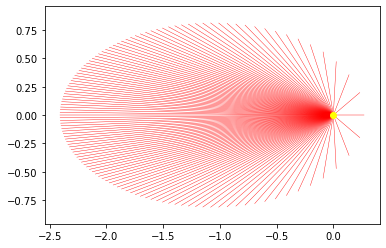

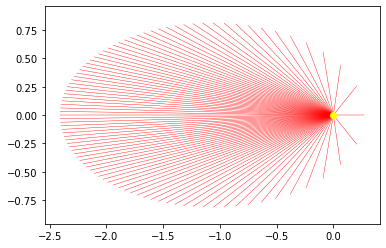

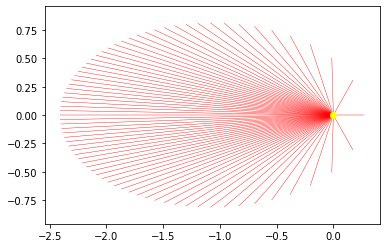

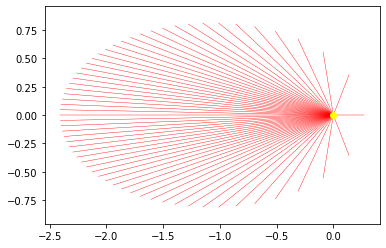

In [17]:
demo_draw_constant_area_speed(a, e, n, 0, 3, 0.4)
demo_draw_constant_area_speed(a, e, n, 0, 4, 0.4)
demo_draw_constant_area_speed(a, e, n, 0, 5, 0.4)
demo_draw_constant_area_speed(a, e, n, 0, 6, 0.4)

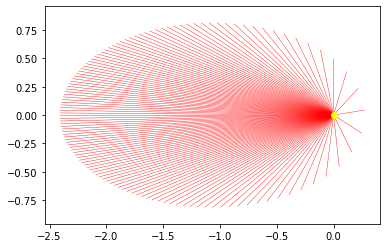

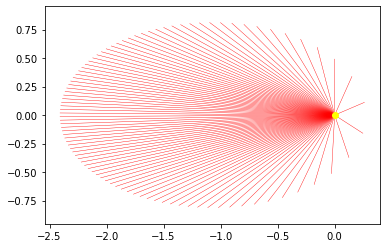

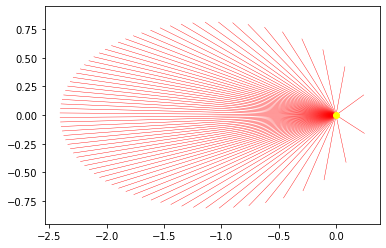

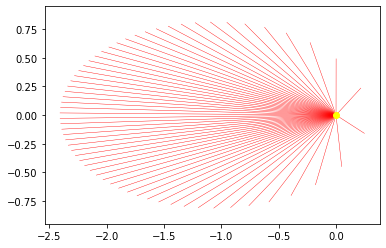

In [18]:
demo_draw_constant_area_speed(a, e, n, M0, 3, 0.4)
demo_draw_constant_area_speed(a, e, n, M0, 4, 0.4)
demo_draw_constant_area_speed(a, e, n, M0, 5, 0.4)
demo_draw_constant_area_speed(a, e, n, M0, 6, 0.4)

#### Next one is distance unit test check

It uses data from JPL, and check the result for a certain date show at their applet.
[153002 orbit diagram](https://ssd.jpl.nasa.gov/sbdb.cgi?sstr=153002;orb=1;cov=0;log=0;cad=0#orb), 

For convertion of dates into Julian day is used this tool [Date to Julian Day](https://ssd.jpl.nasa.gov/tc.cgi). It is relatively simple and would be added later at the code, but not priority now.

In [19]:
## Distance Unit Test

# Asteroid 153002 source JPL and comparing result JPL
# eccentricity
e = 0.7959518780556988
# semi-major axis
a = 1.340551489041067 #au
# mean motion
n = 0.6350074562624759 #deg/d

# period used for checking.
period = 566.9224769719815
assert ((360/period - n) < 1e-8)

## time at last perihelion 
tp = 2458982.285256400691 # Julian Days.

## this way still I cannot hangle.
##(2020-May-12.78525640) # UTC Timestamp in days.

# today
time_date = "2021-05-19 00:00 UTC"
time_today = 2459353.5000000 # Julian Days.

## expected distance
r_expt = 2.253 #au

# time elapsed since last perihelion
t = time_today-tp

#Note! Having time elapsed since last perihelion, mean motion is not needed.

## calc pos
position = kepler_orbit_position(a, e, n, 0, t)
print (f"expected {r_expt} AU +- 0.0005")
print (f"result   {position[0]} AU")
print (f"difference : {r_expt - position[0]} AU")
assert( abs(r_expt - position[0]) < 5e-3 )
print (f"\nDistance : {round(position[0],2)} AU +-0.005")


expected 2.253 AU +- 0.0005
result   2.2480280332070124 AU
difference : 0.004971966792987725 AU

Distance : 2.25 AU +-0.005


In [20]:
#Checking for some period with one month difference

## DATA from JPL
dates_JD_and_distances = []
## 2020-05-12 00:00 UTC
dates_JD_and_distances.append([2458981.5, 0.269]); ## just before perihelion
## 2020-05-12 00:00 UTC
dates_JD_and_distances.append([tp, .2735370137084662]); ## perihelion
## 2020-05-13 00:00 UTC
dates_JD_and_distances.append([2458982.5, 0.268]); ## just after perihelion
## 2020-05-14 00:00 UTC
dates_JD_and_distances.append([2458983.5, 0.269]); ## just after perihelion
## 2020-05-19 00:00 UTC
dates_JD_and_distances.append([2458988.5, 0.32]); ## days after perihelion
## 2020-06-19 00:00 UTC
dates_JD_and_distances.append([2459019.5, 0.888]);
## 2020-07-19 00:00 UTC
dates_JD_and_distances.append([2459049.5, 1.309]);
## 2020-08-19 00:00 UTC
dates_JD_and_distances.append([2459080.5, 1.64]);
## 2020-09-19 00:00 UTC
dates_JD_and_distances.append([2459111.5, 1.894]);
## 2020-10-19 00:00 UTC
dates_JD_and_distances.append([2459141.5, 2.084]);
## 2020-11-19 00:00 UTC
dates_JD_and_distances.append([2459172.5, 2.23]);
## 2020-12-19 00:00 UTC
dates_JD_and_distances.append([2459202.5, 2.329]);
## 2021-01-19 00:00 UTC
dates_JD_and_distances.append([2459233.5, 2.39]);
## 2021-02-16 00:00 UTC
dates_JD_and_distances.append([2459261.5, 2.411]);
## 2021-02-19 00:00 UTC
dates_JD_and_distances.append([2459264.5, 2.412]);
## 2021-03-19 00:00 UTC
dates_JD_and_distances.append([2459292.5, 2.397]);
## 2021-04-19 00:00 UTC
dates_JD_and_distances.append([2459323.5, 2.344]);
## 2021-05-19 00:00 UTC
dates_JD_and_distances.append([2459353.5, 2.253]);
## 2021-06-19 00:00 UTC
dates_JD_and_distances.append([2459384.5, 2.116]);
# 2021-07-19 00:00 UTC
dates_JD_and_distances.append([2459414.5, 1.936]);
# 2021-08-19 00:00 UTC
dates_JD_and_distances.append([2459445.5, 1.694]);
# 2021-09-19 00:00 UTC
dates_JD_and_distances.append([2459476.5, 1.380]);
# 2021-10-03 00:00 UTC 
dates_JD_and_distances.append([2459490.5, 1.208]);
# 2021-10-10 00:00 UTC 
dates_JD_and_distances.append([2459497.5, 1.114]);
# 2021-10-19 00:00 UTC
dates_JD_and_distances.append([2459506.5, 0.983]);
# 2021-10-23 00:00 UTC
dates_JD_and_distances.append([2459510.5, 0.92]);
# 2021-11-19 00:00 UTC
dates_JD_and_distances.append([2459537.5, 0.431]);
# 2021-11-27 00:00 UTC
dates_JD_and_distances.append([2459545.5, 0.297]);
# 2021-11-29 00:00 UTC
dates_JD_and_distances.append([2459547.5, 0.278]);
# 2021-11-30 00:00 UTC
dates_JD_and_distances.append([2459548.5, 0.273]);
# 2021-12-19 00:00 UTC
dates_JD_and_distances.append([2459567.5, 0.544]);
# 2022-01-19 00:00 UTC
dates_JD_and_distances.append([2459598.5, 1.068]);
# 2022-02-19 00:00 UTC
dates_JD_and_distances.append([2459629.5, 1.455]);
# 2022-03-19 00:00 UTC
dates_JD_and_distances.append([2459657.5, 1.725]);

for dd in dates_JD_and_distances:
    today    = dd[0]
    exp_dist = dd[1]
    # time elapsed since last perihelion, mean anomaly 0
    t = today-tp
    position = kepler_orbit_position(a, e, n, 0, t)
    if (t == 0):
        print (f"perihelion exp: {exp_dist:.3f} AU, calc: {position[0]:.10f} AU, diff: {abs(exp_dist - position[0]):.10f}")
    else:
        print (f"{today}, exp: {exp_dist:.3f} AU, calc: {position[0]:.10f} AU, diff: {abs(exp_dist - position[0]):.10f}")


2458981.5, exp: 0.269 AU, calc: 0.2745051146 AU, diff: 0.0055051146
perihelion exp: 0.274 AU, calc: 0.2735370137 AU, diff: 0.0000000000
2458982.5, exp: 0.268 AU, calc: 0.2736095819 AU, diff: 0.0056095819
2458983.5, exp: 0.269 AU, calc: 0.2758456712 AU, diff: 0.0068456712
2458988.5, exp: 0.320 AU, calc: 0.3266874008 AU, diff: 0.0066874008
2459019.5, exp: 0.888 AU, calc: 0.8886835768 AU, diff: 0.0006835768
2459049.5, exp: 1.309 AU, calc: 1.3082578613 AU, diff: 0.0007421387
2459080.5, exp: 1.640 AU, calc: 1.6376679373 AU, diff: 0.0023320627
2459111.5, exp: 1.894 AU, calc: 1.8917239261 AU, diff: 0.0022760739
2459141.5, exp: 2.084 AU, calc: 2.0809662265 AU, diff: 0.0030337735
2459172.5, exp: 2.230 AU, calc: 2.2269586195 AU, diff: 0.0030413805
2459202.5, exp: 2.329 AU, calc: 2.3254802144 AU, diff: 0.0035197856
2459233.5, exp: 2.390 AU, calc: 2.3863852525 AU, diff: 0.0036147475
2459261.5, exp: 2.411 AU, calc: 2.4071995743 AU, diff: 0.0038004257
2459264.5, exp: 2.412 AU, calc: 2.4075343965 AU,

#### Precision of the Distance

The distance calculation will not work if calculation of true anomaly is incorrect, that's why this test shows that at this step the calculations are correct.

The above table contains one and a half orbit of that asteroid and expected and calculated distances differ in less than 0.009, so we may accept the mistake $\pm 0.01AU$ and in most of the cases it is below $\pm 0.005AU$, that checks shows the method works correctly. At JPL they mention the approach used here which is inherited from Kepler, to be suitable for all cases that does not require great precision. And indeed it could work pretty accurate for planning or making some simulations.


### Quadrant problems and Avoiding them

The result of the function *kepler_orbit_position* returns the distance $r$, $cos{\nu}$ $sin{\nu}$ where $\nu$ is the true anomaly, why not just angle $\nu$, because the inversive functions $sin^{-1}()$ and $cos^{-1}()$, have two possible values and it is needed to decide which one to use, for example $a = sin(\alpha) = sin(\pi-\alpha)$, then how much is $sin^{-1}(a)$ $\alpha$ or $\pi-\alpha$. There is similar case for $cos^{-1}$. Knowing both $sin(\alpha)$ and $cos(\alpha)$ is enough to find the angle $\alpha$

Just for demonstration it is given the same table with angles and x and y coordinates


In [21]:
def arcus_angle(cos_v, sin_v):
    '''
    from cos(a) and sin(a) find the angle a in the interval [0, 2pi].
    both are needed to find a single angle that give cos(a) and sin(a).
    '''
    if ( cos_v >= 0 and sin_v >= 0 ):
        if (sin_v < cos_v): ## need to be checked in each case each function has better precision
            return math.asin(sin_v)
        else:
            return math.acos(cos_v)
    elif ( sin_v >= 0 ) : # cos < 0 sin > 0
        if (abs(sin_v) < abs(cos_v)): ## need to be checked in each case each function has better precision
            return math.pi - math.asin(sin_v)
        else:
            return math.acos(cos_v)
    elif ( cos_v <= 0 ): # cos < 0, sin < 0
        return math.pi - math.asin(sin_v)
         ## precision lost with that double pi so (2*math.pi - math.acos(cos_v)) not used.
    else: # cos > 0, sin < 0
        if (abs(sin_v) < abs(cos_v)): ## need to be checked in each case each function has better precision
            return 2*math.pi + math.asin(sin_v)
        else:
            return 2*math.pi - math.acos(cos_v)
        
# border cases
assert(0 == arcus_angle(math.cos(0), math.sin(0)))
assert(math.pi/2 == arcus_angle(math.cos(math.pi/2), math.sin(math.pi/2)))
assert(math.pi == arcus_angle(math.cos(math.pi), math.sin(math.pi)))
        
a1 = math.pi/6
a2 = math.pi - math.pi/6
a3 = math.pi + math.pi/6
a4 = 2*math.pi - math.pi/6

print("Q.I.")
print(math.acos(math.cos(a1)))
print(math.asin(math.sin(a1)))
print("Q.II.")
print(math.acos(math.cos(a2)))
print(math.asin(math.sin(a2)))
print("Q.III.")
print(math.acos(math.cos(a3)))
print(math.asin(math.sin(a3)))
print("Q.IV.")
print(math.acos(math.cos(a4)))
print(math.asin(math.sin(a4)))

assert(a1 == arcus_angle(math.cos(a1), math.sin(a1)))
assert(a2 == arcus_angle(math.cos(a2), math.sin(a2)))
assert(a3 == arcus_angle(math.cos(a3), math.sin(a3)))
assert(a4 == arcus_angle(math.cos(a4), math.sin(a4)))

print()

# 60 degrees
a1 = math.pi/3
a2 = math.pi - math.pi/3
a3 = math.pi + math.pi/3
a4 = 2*math.pi - math.pi/3

print("Q.I.")
print(math.acos(math.cos(a1)))
print(math.asin(math.sin(a1)))
print("Q.II.")
print(math.acos(math.cos(a2)))
print(math.asin(math.sin(a2)))
print("Q.III.")
print(math.acos(math.cos(a3)))
print(math.asin(math.sin(a3)))
print("Q.IV.")
print(math.acos(math.cos(a4)))
print(math.asin(math.sin(a4)))

assert(a1 == arcus_angle(math.cos(a1), math.sin(a1)))
assert(a2 == arcus_angle(math.cos(a2), math.sin(a2)))
assert(a3 == arcus_angle(math.cos(a3), math.sin(a3)))
assert(a4 == arcus_angle(math.cos(a4), math.sin(a4)))

print()
print(math.pi - math.asin(math.sin(a3)))
print(2*math.pi - math.acos(math.cos(a3)))


Q.I.
0.5235987755982987
0.5235987755982988
Q.II.
2.6179938779914944
0.5235987755982988
Q.III.
2.617993877991495
-0.5235987755982986
Q.IV.
0.5235987755982994
-0.5235987755982994

Q.I.
1.0471975511965976
1.0471975511965976
Q.II.
2.0943951023931957
1.0471975511965974
Q.III.
2.094395102393196
-1.0471975511965972
Q.IV.
1.0471975511965976
-1.0471975511965976

4.1887902047863905
4.18879020478639


### math.atan2() function is solving this issue
There is a build in function **math.atan2(y,x)** and it calculates arctangens from $y/x$ and taking the sign into account, but at the moment I haven't checked which of the two approaches have better precision and performance. The next section below is the implementation with math.atan2.

In [22]:
def arcus_angle2(cos_v, sin_v):
    rdns = math.atan2(sin_v, cos_v)
    if ( rdns < 0 ) :
        rdns = rdns + math.pi + math.pi
    return rdns

a1 = math.pi/6
a2 = math.pi - math.pi/6
a3 = math.pi + math.pi/6
a4 = 2*math.pi - math.pi/6

assert(0 == arcus_angle2(math.cos(0), math.sin(0)))
assert(math.pi/2 == arcus_angle2(math.cos(math.pi/2), math.sin(math.pi/2)))
assert(math.pi == arcus_angle2(math.cos(math.pi), math.sin(math.pi)))

print("Q.I.")
assert(a1 == arcus_angle2(math.cos(a1), math.sin(a1)))
print("Q.II.")
assert(a2 == arcus_angle2(math.cos(a2), math.sin(a2)))
print("Q.III.")
assert(abs(a3 - arcus_angle2(math.cos(a3), math.sin(a3)))<1e10-12)
print("Q.IV.")
assert(a4 == arcus_angle2(math.cos(a4), math.sin(a4)))

print()

# 60 degrees
a1 = math.pi/3
a2 = math.pi - math.pi/3
a3 = math.pi + math.pi/3
a4 = 2*math.pi - math.pi/3

print("Q.I.")
assert(a1 == arcus_angle2(math.cos(a1), math.sin(a1)))
print("Q.II.")
assert(a2 == arcus_angle2(math.cos(a2), math.sin(a2)))
print("Q.III.")
assert(abs(a3 == arcus_angle2(math.cos(a3), math.sin(a3)))<1e10-12)
print("Q.IV.")
assert(abs(a4 - arcus_angle2(math.cos(a4), math.sin(a4)))<1e10-12)


Q.I.
Q.II.
Q.III.
Q.IV.

Q.I.
Q.II.
Q.III.
Q.IV.


#### Result for the Asteroid.
Let's print the result for the asteroid, containing Date, Distance, True Anomaly in Degrees and X and Y coordinates. 

In [23]:
def print_positions_at_orbit_plane(a, e, n, tp, dates_JD):
    '''
    Prints positions for requested dates in the form
    Date, Distance, True Anomaly in Degrees and X and Y coordinates.
    
    Parameters:
    a - semi major axis, 
    e - eccentricity
    n - mean motion 
    tp - time (day) of last perihelion 
    
    Note! Because math.sqrt(1-e*e) is calculated over and over again, the
    final procedure would optimize that all repetitive related to orbit calculations
    would be made once and next reused, key to speed is never made a calculation twice.
    '''
    print ("Time [JD] | Distance [AU]|True Anomaly[Deg]|    X [AU]     |   Y [AU]") 
    for today in dates_JD:
        # time elapsed since last perihelion, mean anomaly 0
        t = today-tp
        position = kepler_orbit_position(a, e, n, 0, t)
        r = position[0]
        cos_v = position[1]
        sin_v = position[2]
        x = r*cos_v
        y = r*sin_v
        true_anomaly_rad = arcus_angle(cos_v, sin_v)
        true_anomaly = (true_anomaly_rad*180)/math.pi
        ## print table
        if (t == 0):
            print (f"perihelion| {r:.10f} | {true_anomaly:.11f} | {x:.10f} |  {y:.10f}") 
        else:
            print (f"{today} | {r:.10f} | {true_anomaly:.11f} | {x:.10f} |  {y:.10f}") 

#dates_JD
dates_JD = [d[0] for d in dates_JD_and_distances]

print_positions_at_orbit_plane(a, e, n, tp, dates_JD)

Time [JD] | Distance [AU]|True Anomaly[Deg]|    X [AU]     |   Y [AU]
2458981.5 | 0.2745051146 | 352.76705642606 | 0.2723207330 |  -0.0345611966
perihelion| 0.2735370137 | 0.00000000000 | 0.2735370137 |  0.0000000000
2458982.5 | 0.2736095819 | 1.98230598703 | 0.2734458421 |  0.0094643919
2458983.5 | 0.2758456712 | 11.15254702765 | 0.2706365149 |  0.0533545793
2458988.5 | 0.3266874008 | 50.73544165669 | 0.2067611337 |  0.2529317921
2459019.5 | 0.8886835768 | 124.18383674038 | -0.4993068981 |  0.7351538078
2459049.5 | 1.3082578613 | 141.68249889824 | -1.0264421385 |  0.8111443571
2459080.5 | 1.6376679373 | 151.57989915291 | -1.4402989118 |  0.7794198596
2459111.5 | 1.8917239261 | 158.44971583051 | -1.7594840231 |  0.6948635729
2459141.5 | 2.0809662265 | 163.69191692445 | -1.9972399801 |  0.5843397112
2459172.5 | 2.2269586195 | 168.29618412879 | -2.1806585974 |  0.4517441471
2459202.5 | 2.3254802144 | 172.28623994777 | -2.3044369282 |  0.3121356616
2459233.5 | 2.3863852525 | 176.134168642

###  Angles are passed as sin and cos values.

The second reason is that getting the angle is an extra unneccessary step for the next stages of calculations, next steps whould require exactly  $cos{\nu}$ $sin{\nu}$, no use to get the angle, except for seeing it now. For example the next step is getting coordinates according to *argument of perihelion* $\omega$ - the angle between the perilehion and the ascending node $\Omega$. The argument $\theta$ at polar coordinate system with the initial line for measuring the angles the line Sun and ascending node is $\theta = \omega + \nu$, to make that angle sum we do not need to know the angle it is enough to use simple trigonometry:

$$
    cos(\omega + \nu) = cos(\omega)cos(\nu) - sin(\omega)sin(\nu)
$$
and
$$
    sin(\omega + \nu) = cos(\omega)sin(\nu) + sin(\omega)cos(\nu)
$$

# Computation Of an Ephemeris

Determining the position of planets, asteroids and comets at the Sky involves several stages. The first one from orbital parameters and time to calculate the position in the 2D coordinate system related with orbital plane and semi-major axis was already demonstrated - it uses parameters eccentricity, semi major axis, mean motion, (initial) mean anomaly, and epoch time. For the next stages we need the rest of parameters: argument of perihelion, inclination and longitude of ascending node. Step by step coordinates would be converted to coordinates in different coordinate systems untill we end with heliocentric coordinates. Next we need to know the heliocentric coordinates of Earth at the specified time, and a translation could give coordinates related to Earth, and finally counting the tilt of Earth's axis we can get the desired declination and right ascension.

## Cartesian Coordinates Related to the Sun 

### Rotation of coordinate system in 2D

Let's have two cartesian coordinate system with the same center $0$, $Oxy$ and $Ox'y'$ and let $Ox'y'$ be rotated at positive direction at angle $\alpha$, and let the coordinates of a certain point A be $(x,y)$ at coordinate system $Oxy$ and $(x',y')$ at $Ox'y'$, then how these coordinates are related to each other

After a simple geometry we could see that 
$$
    x' = x\,cos\,{\alpha} + y\,sin\,{\alpha}
$$
and
$$
    y' = y\,cos\,{\alpha} - x\,sin\,{\alpha}
$$,

Using matrixes we can express that coordinate transformation as:

$$
\left(\begin{array}{cc} x'\\ y'\\ \end{array}\right) =
\left(\begin{array}{cc} cos\,{\alpha} & sin\,{\alpha}\\ - sin\,{\alpha} & cos\,{\alpha}\\ \end{array}\right)\cdot\left(\begin{array}{cc} x\\ y\\ \end{array}\right)
$$

If we want to find the inverted transformation from $(x',y')$ to find $(x,y)$, which corresponds to a rotation of the angle $(-\alpha)$, we need to multiply by inverse matrix.

It is easy to check that 
$$
\left(\begin{array}{cc} cos\,{\alpha} & sin\,{\alpha}\\ - sin\,{\alpha} & cos\,{\alpha}\\ \end{array}\right)\cdot\left(\begin{array}{cc} cos\,{\alpha} & -sin\,{\alpha}\\ sin\,{\alpha} & cos\,{\alpha}\\ \end{array}\right)=\left(\begin{array}{cc} 1 & 0\\ 0& 1\\ \end{array}\right)
$$

So we have the inverted transformation which we would need in next stages.

$$
\left(\begin{array}{cc} x\\ y\\ \end{array}\right) =
\left(\begin{array}{cc} cos\,{\alpha} & - sin\,{\alpha}\\ sin\,{\alpha} & cos\,{\alpha}\\ \end{array}\right)\cdot\left(\begin{array}{cc} x'\\ y'\\ \end{array}\right)
$$

We would use that to make several rotations at
![Orbital_elements](Orbit1.svg)

### Cartesian Coordiates at 2D Orbital Plane with X-axis pointing periapsis. 

Let's look at the coordinate system with center the Sun, and X-axis is passing via the point of perihelion (blue line on the drawing), Y-axis is perpendicular to X-axis and on the right from it in the orbital plane. The direction from X-axis to Y-axis corresponds to the rotation of the planet. Z-axis is perpendicular to the orbital plane, and together with X and Y axis form a right tripple:
$$\vec{Oz} = \vec{Ox} \times \vec{Oy}$$
Because the planet moves in its orbital plane Z-coordinate will be $0$.

Solving Kepler's equation would lead to coordinates of the planet at that coordinate systey:

$$
\left(\begin{array}{cc} x_p\\ y_p\\ z_p\end{array}\right) = \left(\begin{array}{cc} r\,cos\,{\nu}\\ r\,sin\,{\nu}\\ 0\end{array}\right) 
$$

For elliptic orbit if we do not need polar coordinates we may use eccentric anomaly $E$ directly, to calculate cartesian coordinates of the planet: 

$$
   x_p = r\,cos\,{\nu} = a(1-e\,cos{E})\frac{cos{E}-e}{1-e\,cos{E}} = a(cos{E}-e) 
$$

and

$$
   y_p = r\,sin\,{\nu} = a(1-e\,cos{E})\frac{\sqrt{1-e^2}\,sin{E}}{1-e\,cos{E}} = b\,sin{E}
$$

where $b$ is semi minor axis
$$
    b = a\sqrt{1-e^2}
$$

And that are our position coordinates which we need to convert to heliocentric coordinates.

$$
\left(\begin{array}{cc} x_p\\ y_p\\ z_p\end{array}\right) = \left(\begin{array}{cc} a(cos{E}-e)\\ b\,sin{E}\\ 0\end{array}\right) 
$$


In [24]:
def _Unused_Block_():
    '''
    The code would be simply reworked
    '''
    ## Calculate distance to the planet
    r = a*dist_factor
    
    ## Calculate true anomaly, cos, and sin
    cos_v = (cos_E-e)/dist_factor
    sin_v = (math.sqrt(1-e*e)*sin_E)/dist_factor

    ## X - coordinate
    xp = a*(cos_E-e)
    ## Y - coordinate
    yp = a*(math.sqrt(1-e*e)*sin_E)
    

### Rotation Clockwise (Negative Direction) of Argument of Perihelion Angle

Now lets rotate our initial coordinate system from the previous section in a such way that the $Ox$-axis the line Sun-perihelion (the blue line on the drawing) to become coincident with the **ascending node** $\Omega$. The rotation is at clockwise direction (opposite to the planet motion), X-axis and Y-axis would rotate, Z-axis stays in place. So the rotation is around Z axis. Let's denote the new axis with $\vec{X_{\Omega}}$, $\vec{Y_{\Omega}}$, $\vec{Z_{\Omega}}$, and $\vec{Z_{\Omega}} = \vec{Oz}$

#### Transformation

$$
\left(\begin{array}{cc} x_{\Omega}\\ y_{\Omega}\\ 0 \\ \end{array}\right) =
    \left(\begin{array}{cc} 
    cos\,{\omega} & - sin\,{\omega} & 0 \\
    sin\,{\omega} & cos\,{\omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} x_p\\ y_p\\ 0 \\\end{array}\right)
$$

Lets denote that matix with 
$$
    R_z(-\omega) = \left(\begin{array}{cc} 
    cos\,{\omega} & - sin\,{\omega} & 0 \\
    sin\,{\omega} & cos\,{\omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
$$


### Rotation Clockwise (Negative Direction) of Inclination Angle

Now lets rotate previous coordinate system around $\vec{X_{\Omega}}$-axis, clockwise (negative direction) at the **inclination angle** $i$, so the orbital plane would be translated into **eccliptic plane of reference**. Now we know that $\vec{X_{\Omega}}$, $\vec{Y_{\Omega}}$, $\vec{Z_{\Omega}}$ are still right tripple, so the $\vec{Y_{\Omega}}$, plays the role of $x$ and $\vec{Z_{\Omega}}$ plays the role of $y$. Lets denote the new axis after the rotation with $\vec{X_i}$, $\vec{Y_i}$, $\vec{Z_i}$, and $\vec{X_i} = \vec{X_{\Omega}}$.

#### Transformation

$$
\left(\begin{array}{cc} x_{i}\\ y_{i}\\ z_{i} \\ \end{array}\right) =
    \left(\begin{array}{cc} 
    1 & 0 & 0 \\
    0 & cos\,{i} & - sin\,{i}\\
    0 & sin\,{i} & cos\,{i}\\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} x_{\Omega}\\ y_{\Omega}\\ 0 \\\end{array}\right)
$$

Lets denote that matix with

$$
R_{x}(-i) =
    \left(\begin{array}{cc} 
    1 & 0 & 0 \\
    0 & cos\,{i} & - sin\,{i}\\
    0 & sin\,{i} & cos\,{i}\\
    \end{array}\right)
$$

#### Retrograde Planets

If a planet moves in the opposite direction to the rotation of Earth and other planets around the Sun that movement could be called retrograde. Actually most comets that comes from Oorth cloud move in that way - in opposite direction to the movement of Solar system objects. In that case the inclination angle is more that 90 degrees.

**For any planet/comet that rotates around the Sun in opposite direction to the planets rotation around the Sun**
$$
    i > 90^{\circ}
$$

And all the calculations remains as already described. Next the code would be tested with **Haley's commet** which has inclication angle bigger that $90^{\circ}$ and rotates in opposite direction.

### Rotation Clockwise (Negative Direction) of Ascending Node.

Now one final rotation clockwise (negative direction) to the **longitude of acsending node** $\Omega$. That is a rotation around $\vec{Z_{i}}$ axis, and the aim is the $\vec{X_{i}}$-axis to go to point **first point of Aries** denoted with **♈︎** which is nowaday at constelation "Pices". That is the point of **spring equinox**, and our reference point to measure right ascension. The line that links the Sun and first point of Aries changes very slowy so we may accept it as inmovable for a certain period of time, and that would be our inmovable reference, together with the equatorial (Earth's orbit plane) and the direction at which all major planet (Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune) rotates around the Sun, we may define a coordinate system. At that heliocentric coordinate system we would receive the final coordinates of the planet. Let's denote its axis with $\vec{X_{ecl}}$, $\vec{Y_{ecl}}$, $\vec{Z_{ecl}}$, - related to eccliptic, heliocentrix and X-axis points to **♈︎**. 


#### Transformation

$$
\left(\begin{array}{cc} x_{ecl}\\ y_{ecl}\\ z_{ecl} \\ \end{array}\right) =
    \left(\begin{array}{cc} 
    cos\,{\Omega} & - sin\,{\Omega} & 0 \\
    sin\,{\Omega} & cos\,{\Omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} x_i\\ y_i\\ z_i \\\end{array}\right)
$$

Lets denote that matix with 
$$
    R_{z}(-\Omega) = \left(\begin{array}{cc} 
    cos\,{\Omega} & - sin\,{\Omega} & 0 \\
    sin\,{\Omega} & cos\,{\Omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
$$

### Receiving Heliocentric Coordinates

Let's put all coordinate transformation together we get that:

$$
\left(\begin{array}{cc} x_{ecl}\\ y_{ecl}\\ z_{ecl} \\ \end{array}\right) =
    \left(\begin{array}{cc} 
    cos\,{\Omega} & - sin\,{\Omega} & 0 \\
    sin\,{\Omega} & cos\,{\Omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} 
    1 & 0 & 0 \\
    0 & cos\,{i} & - sin\,{i}\\
    0 & sin\,{i} & cos\,{i}\\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} 
    cos\,{\omega} & - sin\,{\omega} & 0 \\
    sin\,{\omega} & cos\,{\omega} & 0 \\
    0 & 0 & 1 \\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} x_p\\ y_p\\ 0 \\\end{array}\right)
$$

Multiplication of the three matrixes could be replaced with one matrix equal to their multiplication

$$
    M_{ecl} = R_z(-\Omega) \cdot R_x(-i) \cdot R_z(-\omega)
$$

That matrix could be calculated once, when the orbital parameters are specified and next reused for calculating any planet position as 3D coordinates.


$$
\left(\begin{array}{cc} x_{ecl}\\ y_{ecl}\\ z_{ecl} \\ \end{array}\right) =
    M_{ecl} 
    \cdot
    \left(\begin{array}{cc} x_p\\ y_p\\ 0 \\\end{array}\right)
$$

### Geocentric Equatorial Coordinates.

Now let's move Earth Celestial Sphere center to the Sun. At the day of Spring Equinox the Earth position with respect to the Sun would point the exactly opposite direction the Authumn Equinox, after half an year at the Authumn Equinox, the line Sun-Earth would point to the **first point of Aries** both X-axes would be colinear and point at the same direction, we could see that the Earth's equator is tilted at angle $-\epsilon$, where $\epsilon = 23.5^{\circ}$ is the tilt of the Earth axis toward eccliptic (Earth orbital) plane. Y-axis are on the right for both coordinate system - in positive direction from the X-axis. So we need to rotate clockwise (negative direction) the coordinates around $\vec{OX_{ecl}}$ axis.

![Equator Eccliptic](Ecliptic_vs_equator_small.gif)

#### Transformation [1]

$$
\left(\begin{array}{cc} x_{g,eq}\\ y_{g,eq}\\ z_{g,eq} \\ \end{array}\right) =
    \left(\begin{array}{cc} 
    1 & 0 & 0 \\
    0 & cos\,{\epsilon} & - sin\,{\epsilon}\\
    0 & sin\,{\epsilon} & cos\,{\epsilon}\\
    \end{array}\right)
    \cdot
    \left(\begin{array}{cc} x_{ecl}\\ y_{ecl}\\ z_{ecl} \\\end{array}\right)
$$

Lets denote that matix with

$$
R_{x}(-\epsilon) =
    \left(\begin{array}{cc} 
    1 & 0 & 0 \\
    0 & cos\,{\epsilon} & - sin\,{\epsilon}\\
    0 & sin\,{\epsilon} & cos\,{\epsilon}\\
    \end{array}\right)
$$


To convert coordinates to Earth equatorial plane and Celestial north pole, we need to apply that transformation to the result already received up to now.

$$
\left(\begin{array}{cc} x_{g,eq}\\ y_{g,eq}\\ z_{g,eq} \\ \end{array}\right) =
    R_{x}(-\epsilon)\cdot M_{ecl} 
    \cdot
    \left(\begin{array}{cc} x_p\\ y_p\\ 0 \\\end{array}\right)
$$

If we want directly to calculate ephemeris, of the position at Earth Sky we do not need to move via eccliptic coordinates, we may compute the matrix for convertion of the coordinates in Earth equatorial system.

$$
\left(\begin{array}{cc} x_{g,eq}\\ y_{g,eq}\\ z_{g,eq} \\ \end{array}\right) =
    M_{g,eq} 
    \cdot
    \left(\begin{array}{cc} x_p\\ y_p\\ 0 \\\end{array}\right)
$$
where

$$
    M_{g,eq} = R_{x}(-\epsilon)\cdot M_{ecl}
$$



### Translation of the center if we know the coordinates of Earth

If we know the heliocentric coordinates of Earth we can translate the beginning of the coordinate system with a simple translation, to receive geocentric eccliptic coordinates, and next applying the last transformation to receive geocentric equatorial coordinates, from which declination and right ascension is simply achieved. 

$$
    \left(\begin{array}{cc} x_{g,ecl}\\ y_{g,ecl}\\ z_{g,ecl} \\ \end{array}\right) = \left(\begin{array}{cc} x_{ecl}\\ y_{ecl}\\ z_{ecl} \\ \end{array}\right) - \left(\begin{array}{cc} x^{Earth}_{ecl}\\ y^{Earth}_{ecl}\\ z^{Earth}_{ecl} \\ \end{array}\right)
$$

Now we have all mathematics needed to calculate ephemeris, **the rest is software**.

### Software
For optimal performance each calculation is needed to be done only once.
There are a lot of things that are calculated once per orbital parameters like the matrixes for converting coordinates, the semi minor axis, and etc. Normally is needed many positions to be calculated, what's why it is better all those parameters to be put into a class.

### TODO create such sofware

Due to lack of time the rest of program was not created ...



## TO DO LIST

1. program to make animations.
2. visualize orbits of several planets
3. define speed of the planets, 
6. Import coordinates of the SUN or use Earth movement as approximation
7. Find ephemeris of a planet - decl, ra.
8. Check result with Minor Planet Center.
9. Add Support of parabolic and hyperbolic orbits.

Next big goal perturbation theory..

## Literature

[1] ["Celestial Mechanics" by Dr. J. B. Tatum](http://orca.phys.uvic.ca/~tatum/celmechs.html)

[2] [JPL "Keplerian Elements for Approximate Positions of the Major Planets"](https://ssd.jpl.nasa.gov/?planet_pos)

[3] [JPL Small-Body Database Browser](https://ssd.jpl.nasa.gov/sbdb.cgi)

[4] [Minor Planet Center](https://www.minorplanetcenter.net/)

[5] Wikipedia